In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Churn_Modelling.csv") #Question 2

## Performing descriptive statistics

In [5]:
df.describe() #Question 4

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True) #Dropping unnecessary columns 

In [8]:
country = df["Geography"]

In [9]:
country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
data = country.unique()
data

array(['France', 'Spain', 'Germany'], dtype=object)

## Checking for missing values

In [22]:
bool_series = pd.isnull(country)
bool_series
#no null data

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Geography, Length: 10000, dtype: bool

In [14]:
#Question 5
#Handling Missing Values

null_values = pd.isnull(df[:-1])
df[null_values].count()

#Hence no null values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
gender = df['Gender']
gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Visualizing the data

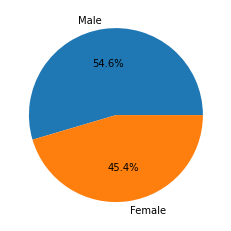

In [14]:
#Univariate Analysis

y = np.array([5457 , 4543])
labels = ["Male" , "Female"]
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.show() 

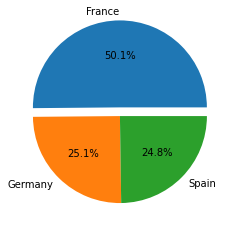

In [15]:

y = np.array([5014, 2509, 2477])
labels = ["France", "Germany", "Spain"]
explode = [0.1,0,0]


plt.pie(y, labels = labels, autopct='%1.1f%%' , explode = explode)
plt.show() 

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

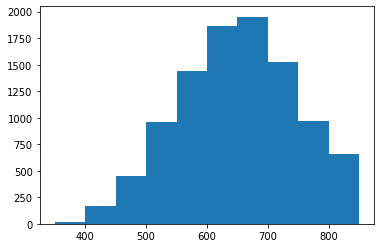

In [16]:
plt.hist(df['CreditScore'])

1    5151
0    4849
Name: IsActiveMember, dtype: int64

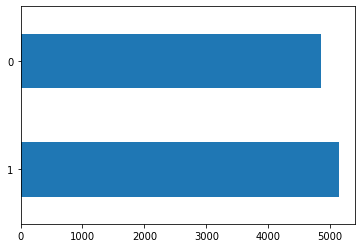

In [48]:
df.IsActiveMember.value_counts().plot(kind='barh');
df.IsActiveMember.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

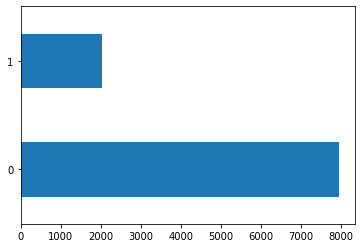

In [49]:
df.Exited.value_counts().sort_values(ascending=False).plot(kind='barh');
df.Exited.value_counts()

<AxesSubplot:xlabel='Exited', ylabel='count'>

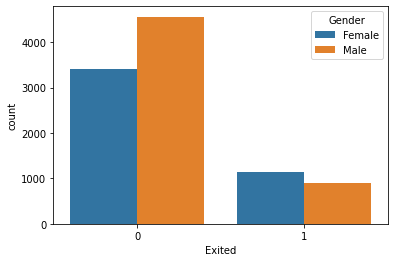

In [52]:
#Bivariate Analysis
sns.countplot(x=df.Exited, hue=df.Gender)

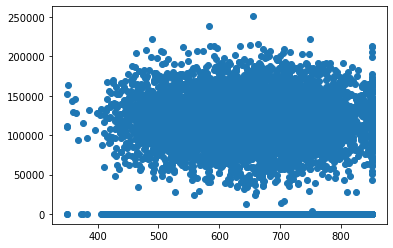

In [21]:
plt.scatter(df["CreditScore"] , df["Balance"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

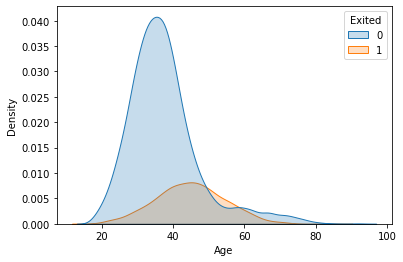

In [17]:
sns.kdeplot(data=df,x="Age",hue="Exited",fill=True)

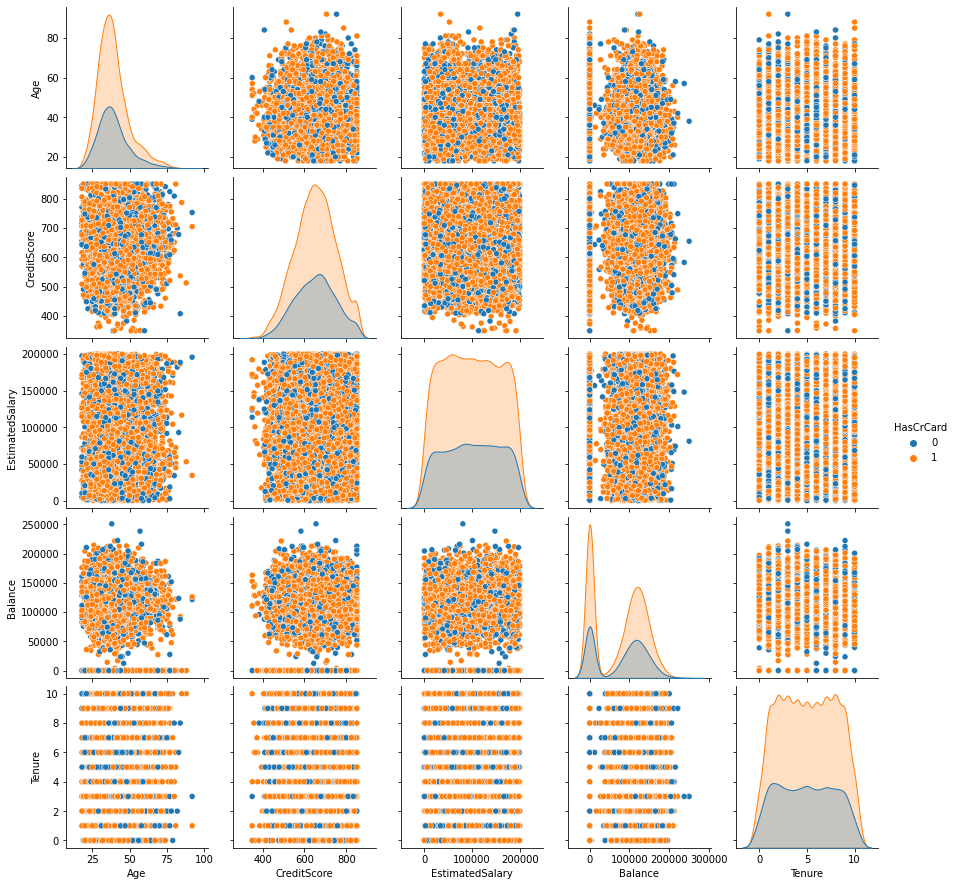

In [18]:
#Multivariate Analysis
sns.pairplot(data=df[['Age','CreditScore','EstimatedSalary','Balance','Tenure','HasCrCard']],hue="HasCrCard")

## Checking for outliers

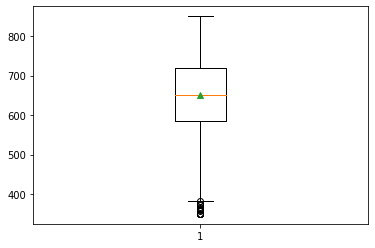

In [32]:
plt.boxplot(df['CreditScore'],showmeans = True)
 
plt.show()

In [33]:
creditScoreOutliers =  np.where(df['CreditScore'] <383)

(array([   7,  942, 1193, 1405, 1631, 1838, 1962, 2473, 2579, 8154, 8723,
        8762, 9210, 9356, 9624]),)

In [27]:
balance = df['Balance']
balance

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

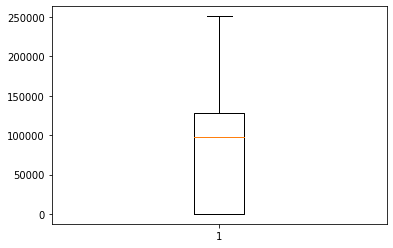

In [29]:
plt.boxplot(balance)
 
plt.show()

In [30]:
estimatedSalary = df['EstimatedSalary']
estimatedSalary

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

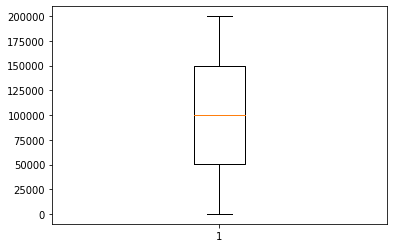

In [36]:
plt.boxplot(estimatedSalary)
 
plt.show()

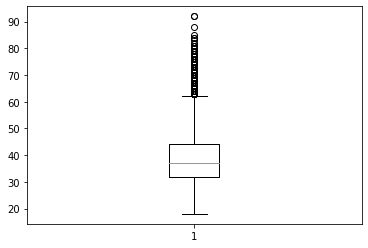

In [38]:
age = df['Age']
plt.boxplot(age)
 
plt.show() #Hence Age and Credit Score have outliers

In [24]:
# Dropping the outlier -  age
indexAge = df[ (df['Age'] <= 18) | (df['Age'] >= 62) ].index
df.drop(indexAge , inplace=True)

In [25]:
# Dropping the outlier -  CreditScore
indexAge = df[ (df['CreditScore'] <= 383) ].index
df.drop(indexAge , inplace=True)

## Perfrom Encoding on categorical data

##### Here the Geography and the Gender columns are encoded

In [26]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'])
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Scaling the Data

In [28]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [30]:
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.502155,0.547619,0.2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.478448,0.523810,0.1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.250000,0.547619,0.8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.674569,0.476190,0.1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000000,0.571429,0.2,0.500246,1,1,1,0.395400,0,0,0,1,1,0


## Check correlation to find independence

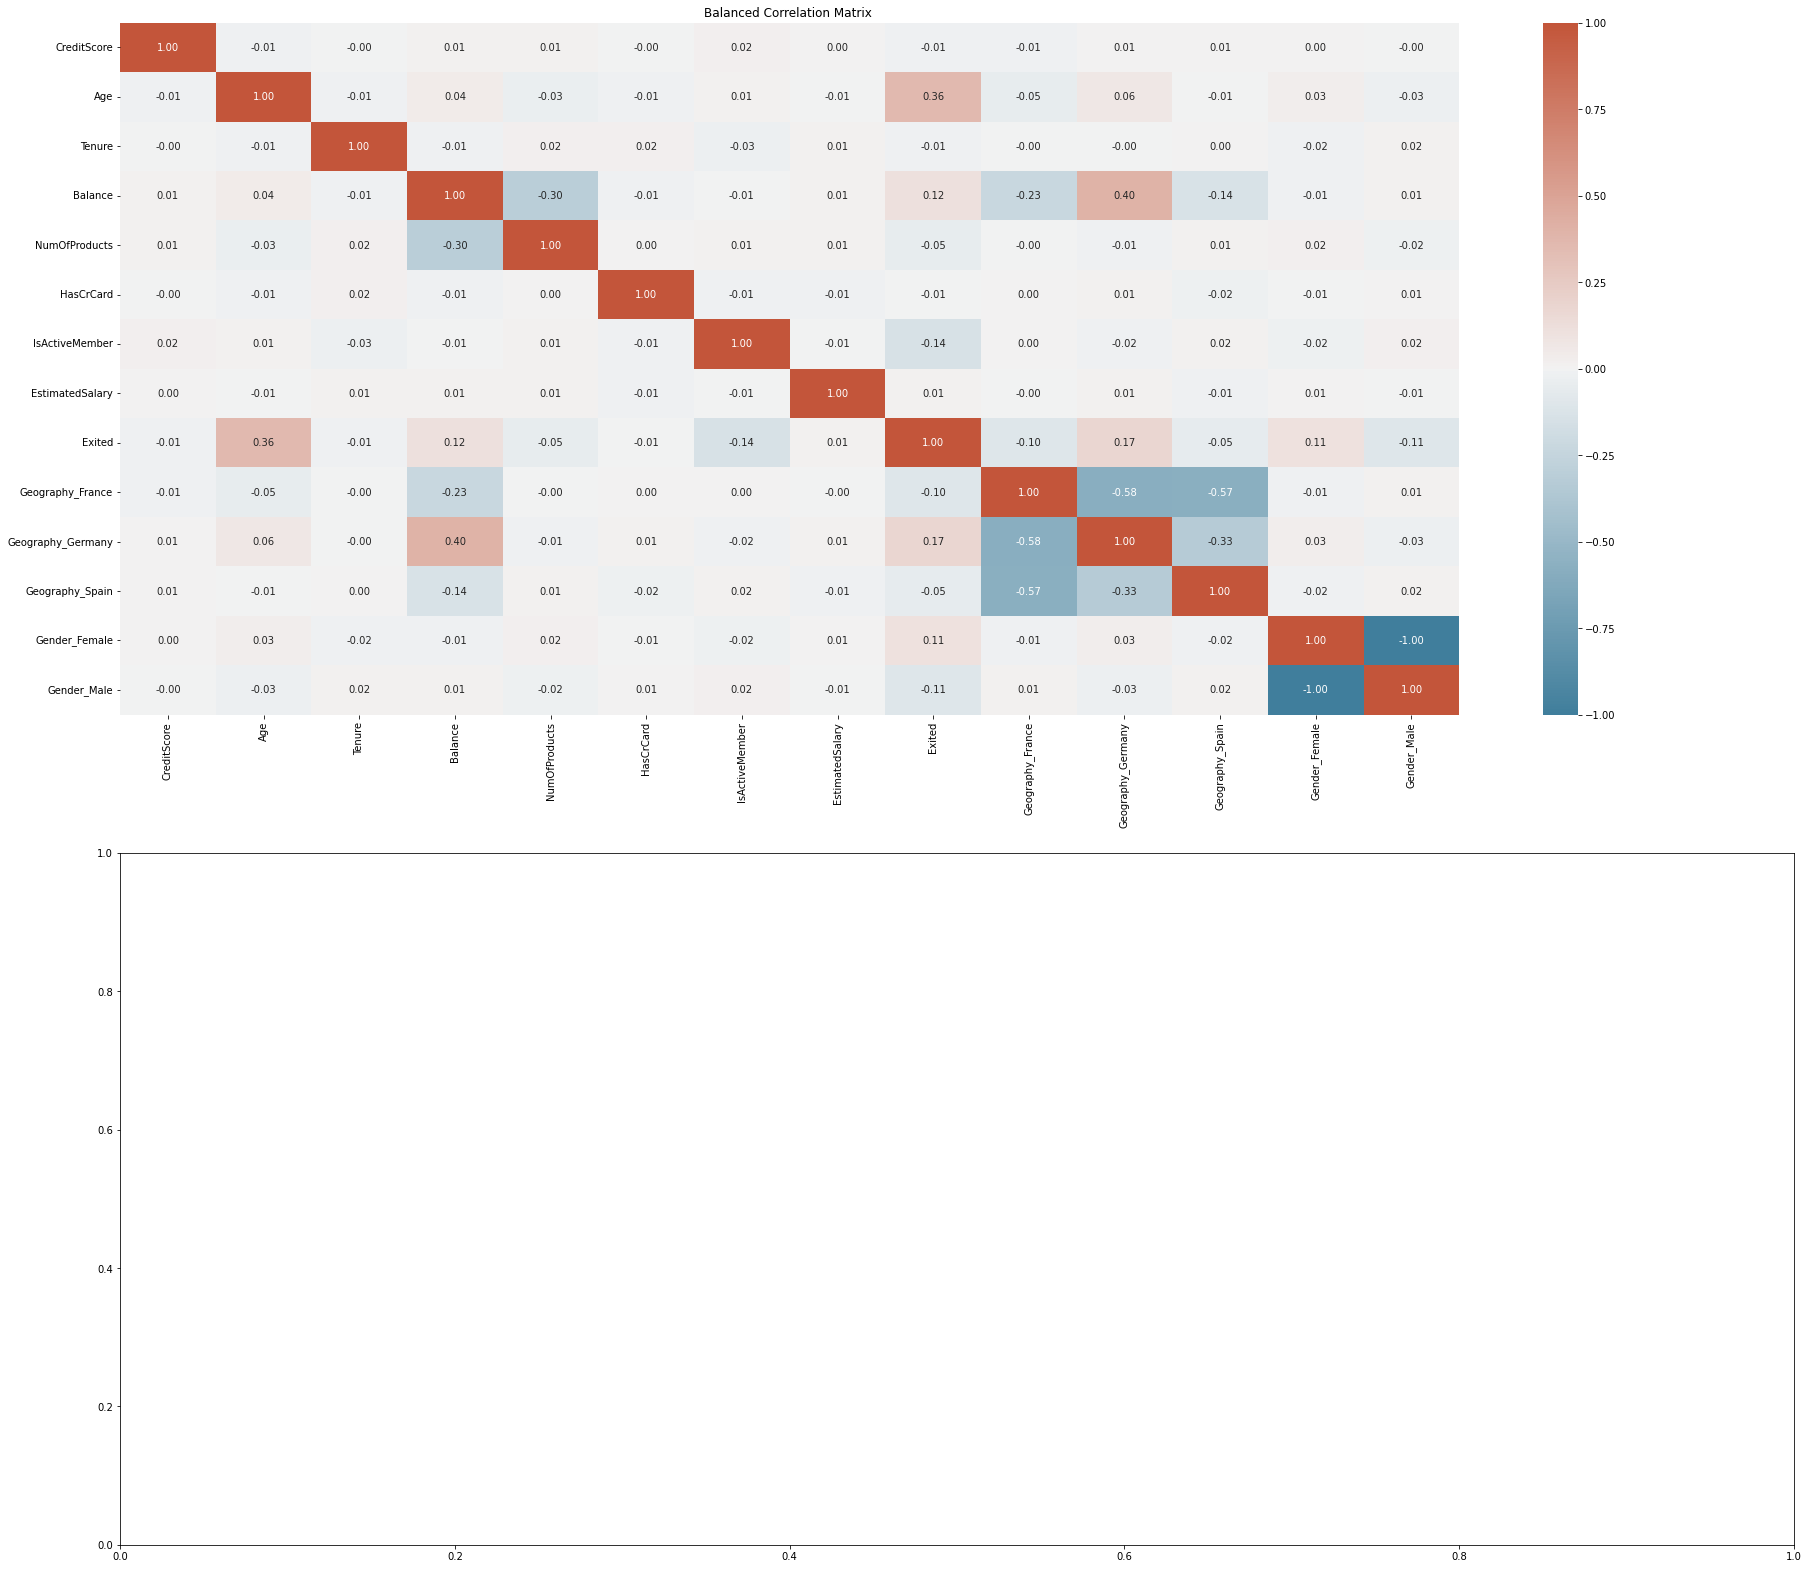

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(30,28))

cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[0])
axes[0].set_title("Balanced Correlation Matrix ",fontweight='light')


plt.show()

## Split the Dataset into Training and Test


In [37]:
from sklearn.model_selection import train_test_split

X = df_encoded[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_France','Geography_Germany','Geography_Spain',	'Gender_Female','Gender_Male']]
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)


In [39]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7635,0.280172,0.238095,0.2,0.418427,1,1,0,0.786910,1,0,0,1,0
9868,0.715517,0.571429,0.0,0.371240,1,1,0,0.837796,1,0,0,1,0
8934,0.991379,0.428571,0.6,0.506596,1,1,1,0.207544,1,0,0,1,0
4086,0.803879,0.285714,0.4,0.394184,1,1,1,0.239129,0,1,0,0,1
4418,0.637931,0.666667,1.0,0.534209,1,1,0,0.721466,0,0,1,1,0


In [40]:
y_train.head()


7635    0
9868    0
8934    0
4086    0
4418    0
Name: Exited, dtype: int64